# 高维数据映射到低维

$$
X=\begin{pmatrix}
    X_1^1 & X_1^2 & \cdots & X_1^n \\
    X_2^1 & X_2^2 & \cdots & X_2^n \\
    \vdots &  \vdots & \ddots & \dots \\
    X_m^1 & X_m^2 & \cdots & X_m^n
\end{pmatrix} 
$$
$$
W_k=\begin{pmatrix}
    W_1^1 & W_1^2 & \cdots & W_1^n \\
    W_2^1 & W_2^2 & \cdots & W_2^n \\
    \vdots &  \vdots & \ddots & \dots \\
    W_k^1 & W_k^2 & \cdots & W_k^n
\end{pmatrix}
$$

本质上还是矩阵的乘法$X\cdot{W_k^T}$ 

思考：如果我们已经把高维数据降维了，还有办法恢复到原来的维度吗？

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../')

In [3]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] +3. +np.random.normal(0,10.,size=100)

In [4]:
from playMachine.PCA import PCA

In [5]:
pca = PCA(n_components=2)

In [6]:
pca.fit(X)

PCA(n_components=2)

In [7]:
pca.components_

array([[ 0.76782587,  0.64065859],
       [-0.64065498,  0.76782888]])

In [8]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [9]:
X_reduction=pca.transform(X)

In [10]:
X_reduction.shape

(100, 1)

In [11]:
X_reduction=pca.inverse_transform(X_reduction)

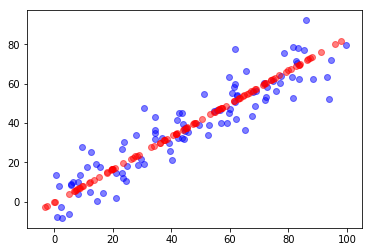

In [12]:
plt.scatter(X[:,0],X[:,1],color='b',alpha = 0.5)
plt.scatter(X_reduction[:,0],X_reduction[:,1],color='r',alpha = 0.5)

### scikit-learn中的PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_

array([[0.76782584, 0.64065863]])

In [16]:
X_reduction=pca.transform(X)

In [17]:
X_reduction.shape

(100, 1)

In [18]:
X_restore = pca.inverse_transform(X_reduction)

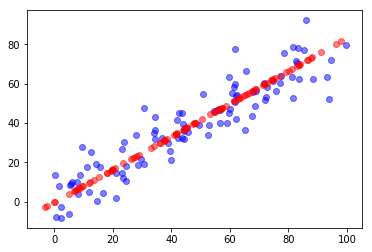

In [19]:
plt.scatter(X[:,0],X[:,1],color='b',alpha = 0.5)
plt.scatter(X_restore[:,0],X_restore[:,1],color='r',alpha = 0.5)

In [20]:
from sklearn import datasets

In [21]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [24]:
X_train.shape

(1347, 64)

In [25]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.72 ms


In [26]:
knn_clf.score(X_test,y_test)

0.9866666666666667

In [27]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [28]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.1 ms


In [29]:
knn_clf.score(X_test_reduction,y_test)

0.6066666666666667

In [30]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

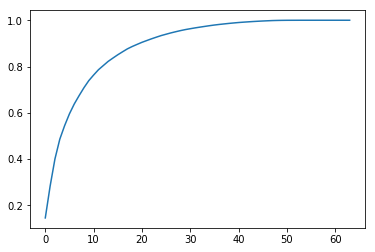

In [31]:
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [32]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.n_components_

28

In [34]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [35]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction,y_train)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.7 ms


In [36]:
knn_clf.score(X_test_reduction,y_test)

0.98

### 数据降维到2维并非没有意义可以进行可视化操作

In [37]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction=pca.transform(X)

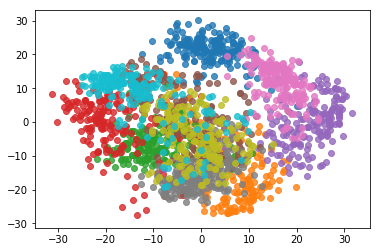

In [38]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0],X_reduction[y==i,1],alpha=0.8)

In [39]:
from sklearn import datasets

digits = datasets.load_digits()
X=digits.data
y=digits.target

In [40]:
noisy_digits = X+np.random.normal(0,4,size=X.shape)

In [43]:
exam_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    X_num = noisy_digits[y==num,:][:10]
    exam_digits = np.vstack([exam_digits,X_num])

In [44]:
exam_digits.shape

(100, 64)

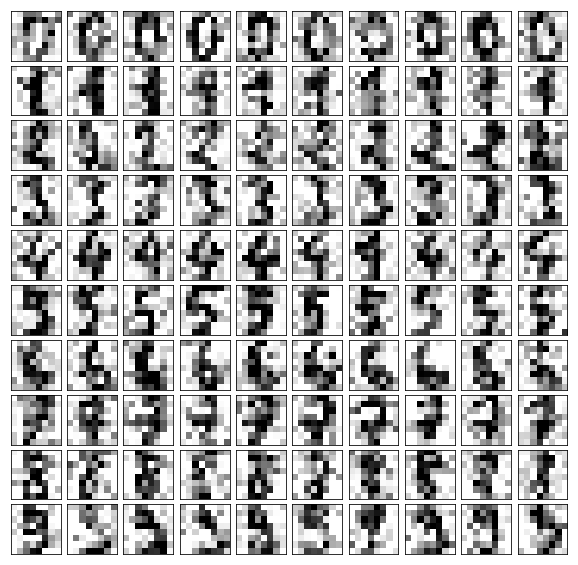

In [45]:
def plot_digits(data):
    fig,axes = plt.subplots(10,10,figsize=(10,10),
                           subplot_kw={"xticks":[],"yticks":[]},
                           gridspec_kw = dict(hspace = 0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                  cmap='binary',interpolation='nearest',
                 clim=(0,16))

plot_digits(exam_digits)

In [63]:
pca = PCA(0.5)
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca.n_components_

12

In [65]:
compoents = pca.transform(exam_digits)
filtered_digits = pca.inverse_transform(compoents)

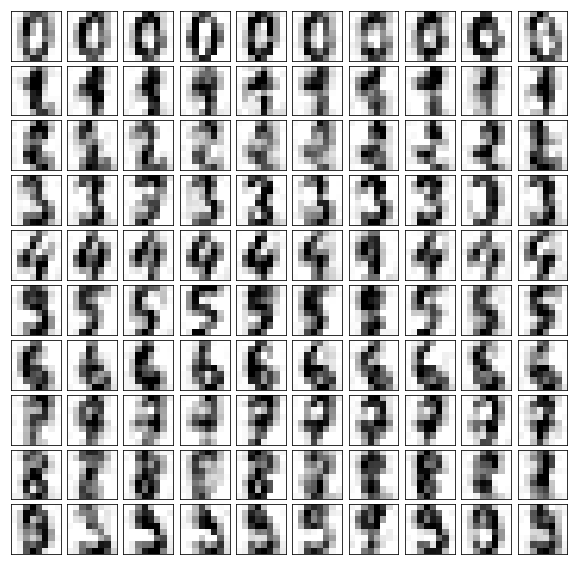

In [66]:
plot_digits(filtered_digits)